In [1]:
import os
import sys
sys.path.append('../')
from src.compress_sensing_library import reconstruct, generate_V1_variables, generate_gaussian_variables, generate_classical_variables, error_calculation
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import pywt
import pandas as pd

In [2]:
img_list = ["image/tree_part1.jpg", "image/", "image/city_part2.png", "image/city_part3.png"]
big_img = "image/city_grayscaled.png"

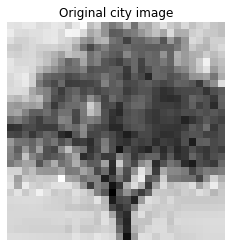

In [3]:
image_nm = img_list[0]
save_nm = image_nm.split('/')[1].split('.')[0]
root = "../"
img = Image.open(os.path.join(root + image_nm))
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.axis('off')
plt.title('Original city image')
plt.imshow(img_arr, 'gray')

num_cell = 500
cell_size = 7
cell_freq = 2
alpha = 1
dwt_type =  'db1'
lv = 1

# V1

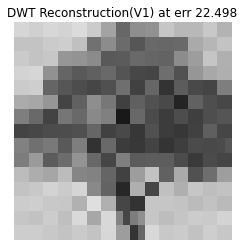

Error: 22.497790700149388


In [4]:
W_V1, y_V1 = generate_V1_variables(num_cell, cell_size, cell_freq, img_arr)
theta_V1, reconst_V1, s_V1 = reconstruct(W_V1, y_V1, alpha = alpha, method = 'dwt', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(V1) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_V1))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_V1, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_V1))

# Gaussian

In [5]:
W_Gau, y_Gau = generate_gaussian_variables(img_arr, num_cell)
theta_Gau, reconst_Gau, s_Gau = reconstruct(W_Gau, y_Gau, alpha = alpha / 2, method = 'dct', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(Gau) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_Gau))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_Gau, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_Gau))

TypeError: fourier_reconstruct() missing 1 required positional argument: 'fit_intercept'

C:\Users\qkstn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2036436.5194281898, tolerance: 945741.2993524133
  model = cd_fast.enet_coordinate_descent(


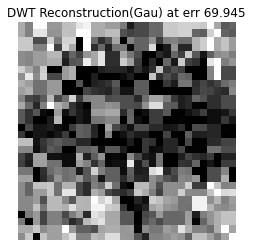

Error: 69.94453285436138


In [6]:
W_Gau, y_Gau = generate_gaussian_variables(img_arr, num_cell)
theta_Gau, reconst_Gau, s_Gau = reconstruct(W_Gau, y_Gau, alpha = alpha / 2, method = 'dwt', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(Gau) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_Gau))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_Gau, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_Gau))

# Classical

In [ ]:
W_Cla.shape
# y_Cla.shape

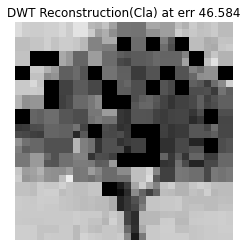

Error: 46.584490571547356


In [7]:
W_Cla, y_Cla = generate_classical_variables(img_arr, num_cell)
theta_Cla, reconst_Cla, s_Cla = reconstruct(W_Cla, y_Cla, method = 'dwt', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(Cla) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_Cla))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_Cla, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_Cla))